In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('../input/flight-take-off-data-jfk-airport/M1_final.csv')
df.head(2)

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,...,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT
0,11,1,5,B6,N828JB,CHS,-1,124,636,324,...,34,58,W,25,38,29.86,Fair / Windy,9,17,14
1,11,1,5,B6,N992JB,LAX,-7,371,2475,340,...,34,58,W,25,38,29.86,Fair / Windy,9,17,15


# **Label Encoding**

In [3]:
from sklearn.preprocessing import LabelEncoder

In [4]:
label_encoder = LabelEncoder()

df['OP_UNIQUE_CARRIER'] = label_encoder.fit_transform(df['OP_UNIQUE_CARRIER'].astype(str))
df['TAIL_NUM'] = label_encoder.fit_transform(df['TAIL_NUM'].astype(str))
df['DEST'] = label_encoder.fit_transform(df['DEST'].astype(str))
df['Wind'] = label_encoder.fit_transform(df['Wind'].astype(str))
df['Condition'] = label_encoder.fit_transform(df['Condition'].astype(str))

Splitting Features and Outcomes

In [5]:
X = df.drop('TAXI_OUT',1)
Y = df['TAXI_OUT']

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.1, random_state=1)
print(X_train.shape, X_test.shape ,Y_train.shape ,Y_test.shape)

(25938, 22) (2882, 22) (25938,) (2882,)


### 1. Linear Regression

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [8]:
linear_regression = LinearRegression()
linear_regression.fit(X_train.values, Y_train.values)

rmse11 = (mean_squared_error(Y_test, linear_regression.predict(X_test))**0.5)
print(rmse11)

6.507425087582124


### 2. Ridge Regression

In [9]:
from sklearn.linear_model import Ridge

In [10]:
ridge_regression = Ridge(alpha=0.05, normalize=True)
ridge_regression.fit(X_train,Y_train)

rmse12 = (mean_squared_error(Y_test, ridge_regression.predict(X_test))**0.5)
print(rmse12)

6.5293151681677255


### 3. Lasso Regression

In [11]:
from sklearn.linear_model import Lasso

In [12]:
lasso_regression = Lasso(alpha=1,max_iter=1000,tol=.01)
lasso_regression.fit(X_train, Y_train)

rmse13 = (mean_squared_error(Y_test, lasso_regression.predict(X_test))**0.5)
print(rmse13)

6.556691378322692


### 4. KNN Model

In [13]:
from sklearn.neighbors import KNeighborsRegressor

In [14]:
knn_regression = KNeighborsRegressor(n_neighbors=200)
knn_regression.fit(X_train,Y_train)

rmse14 = (mean_squared_error(Y_test, knn_regression.predict(X_test))**0.5)
print(rmse14)

6.6568018597000504


### 5. SVR Model

In [15]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

In [16]:
scaler = StandardScaler()

X_train_st = scaler.fit_transform(X_train)
X_test_st = scaler.fit_transform(X_test)

svr = SVR()
svr.fit(X_train_st, Y_train)

rmse15 = (mean_squared_error(Y_test,svr.predict(X_test_st))**0.5)
print(rmse15)

6.243031999767116


### 6. Naive Bayes

In [17]:
from sklearn.linear_model import BayesianRidge

In [18]:
naive_bayes = BayesianRidge()
naive_bayes.fit(X_train,Y_train)

rmse16 = (mean_squared_error(Y_test, naive_bayes.predict(X_test))**0.5)
print(rmse16)

6.514038406947584


### 7. LightGBM Model

In [19]:
from lightgbm import LGBMRegressor

In [20]:
X_train_dropped = X_train.drop(["Dew Point"], 1)
X_test_dropped = X_test.drop(["Dew Point"], 1)

lgbm_regressor = LGBMRegressor()
lgbm_regressor.fit(X_train_dropped, Y_train)

rmse17 = (mean_squared_error(Y_test, lgbm_regressor.predict(X_test_dropped))**0.5)
print(rmse17)

5.728006919772796


### 8. Random Forest

In [21]:
from sklearn.ensemble import RandomForestRegressor

In [22]:
random_forest = RandomForestRegressor()
random_forest.fit(X_train, Y_train)

rmse18 = (mean_squared_error(Y_test, random_forest.predict(X_test))**0.5)
print(rmse18)

5.659346181489792


# **One-Hot Encoding**

In [23]:
from sklearn.preprocessing import OneHotEncoder

In [24]:
X1 = df.drop('TAXI_OUT', 1)
Y1 = df['TAXI_OUT']

In [25]:
label_encoder = LabelEncoder()

X1 = pd.get_dummies(X1, columns = ['MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'OP_UNIQUE_CARRIER', 'DEST'])

X1['TAIL_NUM'] = label_encoder.fit_transform(X1['TAIL_NUM'].astype(str))
X1['Wind'] = label_encoder.fit_transform(X1['Wind'].astype(str))
X1['Condition'] = label_encoder.fit_transform(X1['Condition'].astype(str))

In [26]:
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.1, random_state=1)
print(X1_train.shape, X1_test.shape ,Y1_train.shape ,Y1_test.shape)

(25938, 132) (2882, 132) (25938,) (2882,)


### 1. Linear Regression

In [27]:
linear_regression = LinearRegression()
linear_regression.fit(X1_train.values, Y1_train.values)

rmse21 = (mean_squared_error(Y1_test, linear_regression.predict(X1_test))**0.5)
print(rmse21)

6.288573745303107


### 2. Ridge Regression

In [28]:
ridge_regression = Ridge(alpha=0.05, normalize=True)
ridge_regression.fit(X1_train,Y1_train)

rmse22 = (mean_squared_error(Y1_test, ridge_regression.predict(X1_test))**0.5)
print(rmse22)

6.297224458814589


### 3. Lasso Regression

In [29]:
lasso_regression = Lasso(alpha=1,max_iter=1000,tol=.01)
lasso_regression.fit(X1_train, Y1_train)

rmse23 = (mean_squared_error(Y1_test, lasso_regression.predict(X1_test))**0.5)
print(rmse23)

6.585927963613412


### 4. KNN Model

In [30]:
knn_regression = KNeighborsRegressor(n_neighbors=200)
knn_regression.fit(X1_train,Y1_train)

rmse24 = (mean_squared_error(Y1_test, knn_regression.predict(X1_test))**0.5)
print(rmse24)

6.676615920319742


### 5. SVR Model

In [31]:
scaler = StandardScaler()

X1_train_st = scaler.fit_transform(X1_train)
X1_test_st = scaler.fit_transform(X1_test)

svr = SVR()
svr.fit(X1_train_st, Y1_train)

rmse25 = (mean_squared_error(Y1_test,svr.predict(X1_test_st))**0.5)
print(rmse25)

6.24241338439302


### 6. Naive Bayes

In [32]:
naive_bayes = BayesianRidge()
naive_bayes.fit(X1_train,Y1_train)

rmse26 = (mean_squared_error(Y1_test, naive_bayes.predict(X1_test))**0.5)
print(rmse26)

6.290610704202926


### 7. LightGBM Model

In [33]:
X1_train_dropped = X1_train.drop(["Dew Point"], 1)
X1_test_dropped = X1_test.drop(["Dew Point"], 1)

lgbm_regressor = LGBMRegressor()
lgbm_regressor.fit(X1_train_dropped, Y1_train)

rmse27 = (mean_squared_error(Y1_test, lgbm_regressor.predict(X1_test_dropped))**0.5)
print(rmse27)

5.706402253502657


### 8. Random Forest

In [34]:
random_forest = RandomForestRegressor()
random_forest.fit(X1_train, Y1_train)

rmse28 = (mean_squared_error(Y1_test, random_forest.predict(X1_test))**0.5)
print(rmse28)

5.595434384143812


# Comparison

LNR : Linear Regression
RR : Ridge Regression
LSR : Lasso Regression
KNN : KNN Regression
SVR : Support Vector Regression
NBR : Naive Bayes
LGBM : Light GBM
RFR : Random Forest Regression


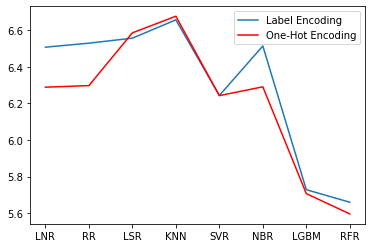

In [35]:
import matplotlib.pyplot as plt
models=["Linear Regression","Ridge Regression","Lasso Regression","KNN Regression","Support Vector Regression","Naive Bayes","Light GBM","Random Forest Regression"]
mod1=["LNR","RR","LSR","KNN","SVR","NBR","LGBM","RFR"]

rmse_le = [rmse11, rmse12, rmse13, rmse14, rmse15, rmse16, rmse17, rmse18]
rmse_ohe = [rmse21, rmse22, rmse23, rmse24, rmse25, rmse26, rmse27, rmse28]

plt.plot(mod1,rmse_le)
plt.plot(mod1,rmse_ohe,'r')
plt.legend(["Label Encoding","One-Hot Encoding"])
for i in range(8) :
  print(mod1[i],":",models[i])
plt.show()

## Conclusion

**One-Hot Encoding** makes sure that no specification is preferred over the other, i.e, there is no preference in the indexing. In **Label Encoding**, that is not the case. Therefore, **One-Hot Encoding** has lower error than **Label Encoding**.